## North American Bank Customer Churn Analysis

### Levels for Data Exploration

* Level 0 : Understanding Data
* Level 1 : Univariate Analysis  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from tabulate import tabulate  
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
DF=pd.read_csv("DS1_C8_V3_ND_Sprint3_BankChurn_Data.csv")
DF

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,England,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,Northern Ireland,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,England,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,Wales,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,England,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,England,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,England,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,England,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,England,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


### Level 0 Analysis: Understanding Data 

In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             9995 non-null   object 
 9   Region                    10127 non-null  object 
 10  Months_on_book            10127 non-null  int64  
 11  Total_Relationship_Count  10127 non-null  int64  
 12  Months_Inactive_12_mon    10127 non-null  int64  
 13  Contacts_Count_12_mon     10127 non-null  int64  
 14  Credit

In [4]:
print(DF.shape)

(10127, 20)


In [5]:
print(DF.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Region', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Avg_Utilization_Ratio'],
      dtype='object')


In [6]:
DF.isnull().sum()

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Region                        0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

In [7]:
# Seprating out the categorical and continuous variables
def seprate_data_types(DF):
    categorical = []
    continuous = []
    for column in DF.columns:                # looping on the number of columns
        if DF[column].nunique() < 100:       # nunique:  returns unique values in the column,
                                                    #here 100 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(DF)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical               continuous
------------------------  ---------------------
Attrition_Flag            CLIENTNUM
Customer_Age              Credit_Limit
Gender                    Total_Revolving_Bal
Dependent_count           Avg_Open_To_Buy
Education_Level           Total_Trans_Amt
Marital_Status            Total_Trans_Ct
Income_Category           Avg_Utilization_Ratio
Card_Category
Region
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon



# $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

###  Level 1 Analysis (Univariate Analysis) 
User-defined function for level 1 analysis of categorical columns
This function will check for the following \
Unique values \
Mode \
Total count of missing values 

In [8]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {DF[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {DF[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {DF[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe

In [9]:
def bar_percentage(ax, count: "number of rows in data "):
    for bar in ax.patches:                                            # ax.patches returns the rectange object from matplotlib
        percentage = f"{round((bar.get_height() / count) *100, 2)}%"  # first it calculate the bar height and then dividing by the number of row(to calculate percentage)
                                                                            # in data and multiply with 100 to get the percentage and rounding of by 2 numbers.
        x = bar.get_x() + bar.get_width() /2                          # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
        y = bar.get_height()                                          # get_height: returns height of rectangle bar.
        ax.annotate(percentage, (x, y), va = "bottom", ha = "center") # va: Vertical axis: -> top means percentage would bneath the bar head. top, bottom or center 
                                                                      # ha: Horizontal axis:-> how you want to keep it. can be changed to center, left, right.
                                                                      # annotate: used to annotate over objects. here objects are the bars 
    plt.show()

### Analysis of  Card Category: Type of card 

In [10]:
info_of_cat("Card_Category")

Unique values in Card_Category are: ['Blue' 'Gold' 'Silver' nan 'Platinum']
Mode of Card_Category is Blue
Number of missing values in Card_Category is 132


Card_Category is a nominal datatype (Categorical).

### Missing value treatment:  Mode of the Card Type

In [11]:
card_mode = DF.Card_Category.mode()[0]
print(card_mode)
DF["Card_Category"].fillna(card_mode, inplace = True)

Blue


### Visual presentation of card category attribute 

Blue        9447
Silver       544
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


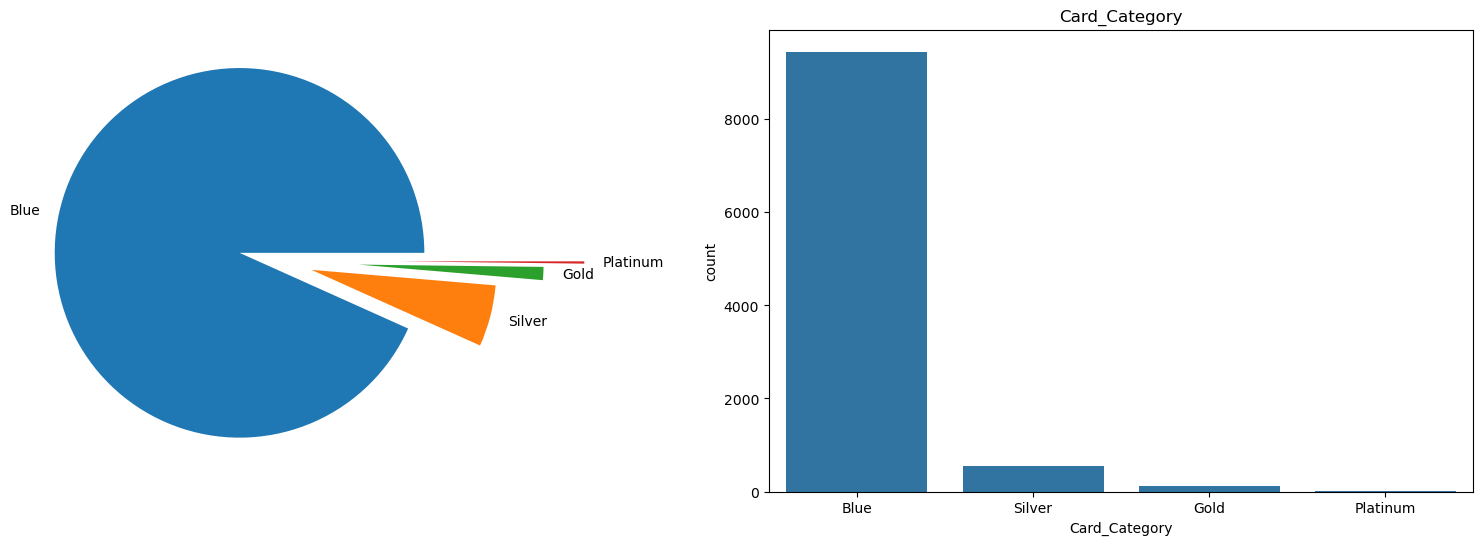

In [12]:
data = DF["Card_Category"].value_counts()                                   #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                         # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.2, 0.2, 0.45, 0.67], labels = labels)         # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sns.countplot(x = DF["Card_Category"], ax = ax[1], order = DF["Card_Category"].value_counts().index)                                                                                               
plt.title("Card_Category")                                                  # title is used to prints the title on the image. 
plt.show()

* Interpretation: Majority of the population is using the Blue card followed by Silver. The Platinum card is sold the least. 

###  Analysis of  Gender column: Gender of a person (Male or Female) 

In [13]:
info_of_cat("Gender")

Unique values in Gender are: ['M' 'F']
Mode of Gender is F
Number of missing values in Gender is 0


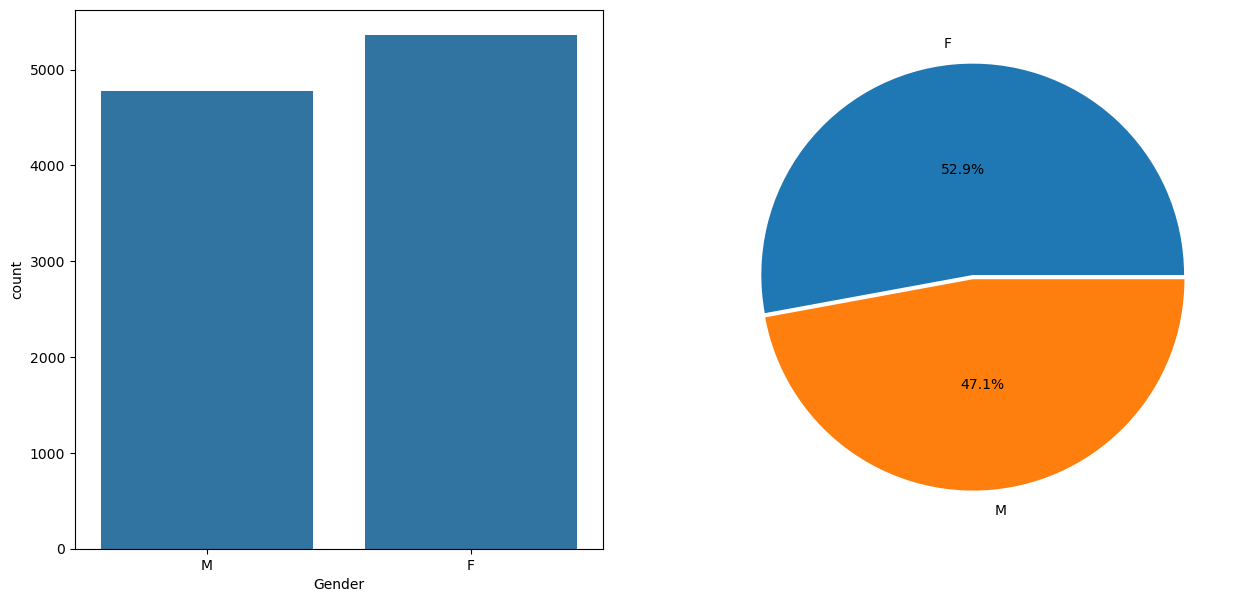

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
data = DF["Gender"].value_counts()                                  # Value count is an inbuilt function to calculate the number of classes                                                                       #in gender columns
labels =data.keys()                                                  #data keys provide the index names but this function provides the columns 
                                                                     #names if called on dataframe
sns.countplot(x = DF["Gender"], ax = ax[0])
plt.pie(x = data, autopct = "%.1f%%", explode = [0.02, 0.0], labels = labels, pctdistance = 0.5) # pctdistance is the distance between the percentage
                                                                     # on pie chart from center.
                                                                     #  explode is to split the slices by the distance provided
                                                                     # autopct: is used to print the number on pie slices.  

plt.show()

* Interpretation: Female customers are more in number, contributing to 53%.

###  Analysis of  Dependent Count: Number of dependents on each customer  

In [15]:
info_of_cat("Dependent_count") # check for the unique values in the feature

Unique values in Dependent_count are: [  3   5   4   2   0   1   9  29 103  22  25  78  90  35  60  42 119 104
  88  48  34 143 100  59 130  95   7  82  69  92 110  17  10  27  19 109
 142 116 113 125  80  63  24  97 102  52  87  11 117  13  67  89  61  72
 120  76]
Mode of Dependent_count is 3
Number of missing values in Dependent_count is 0


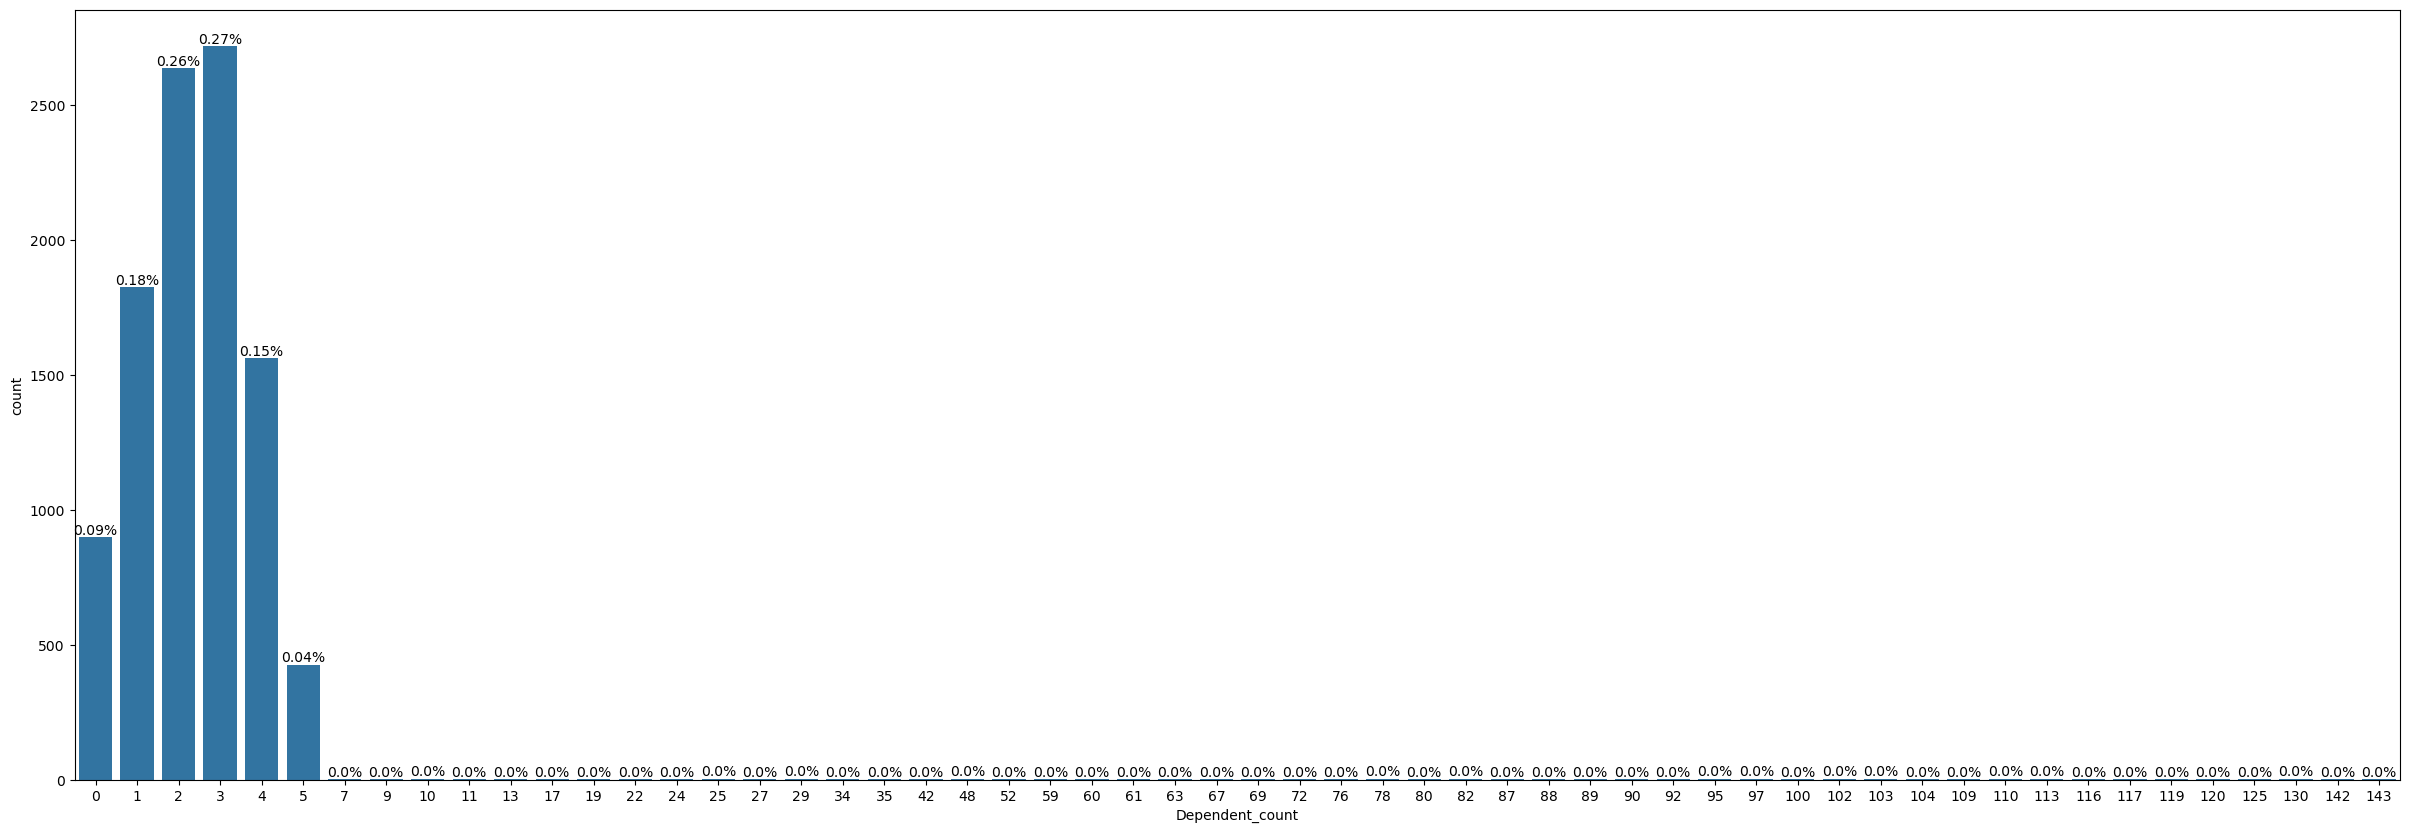

In [16]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = DF["Dependent_count"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(DF), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
    fig.set_figheight(10)                                                             # annotate: used to annotate over objects, here objects are the bars
    fig.set_figwidth(30)
plt.show()

* Interpretation: Very few people are having more than 5 dependents. However, there are some cases where the dependent count is greater than 100, which is abnormal. Hence, data clearing might be  required. 

###  Outliers Analysis and Treatment: 
The customers who have a dependent count greater than the 5 are replaced with the mean of the population.

In [17]:
# Making changes in data
mean = int(DF.Dependent_count.mean())
# accessing the data higher than 5
x = DF[DF["Dependent_count"] > 5].index
for index in x:
    DF.loc[index, "Dependent_count"] = mean

In [18]:
info_of_cat("Dependent_count") 

Unique values in Dependent_count are: [3 5 4 2 0 1]
Mode of Dependent_count is 3
Number of missing values in Dependent_count is 0


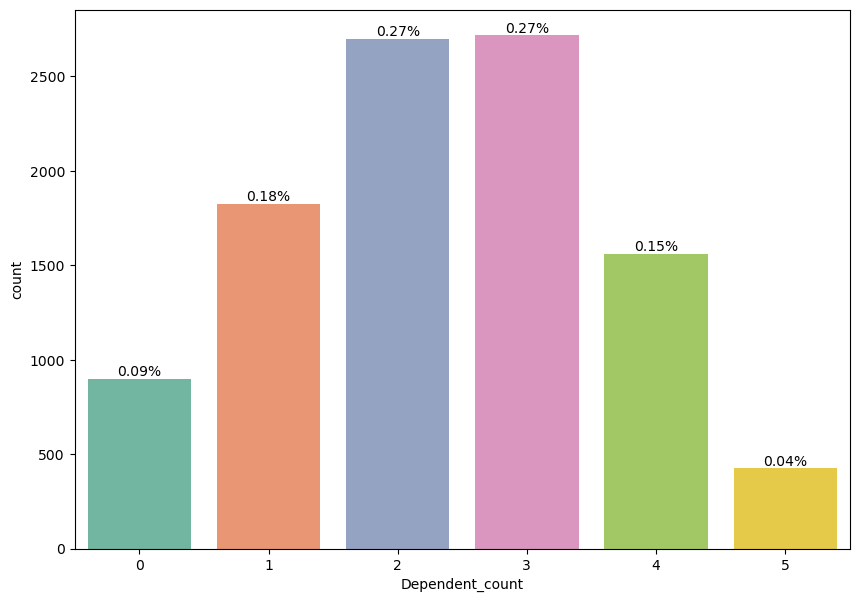

In [19]:
custom_palette = sns.color_palette("Set2", n_colors=len(DF["Dependent_count"].unique()))
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = DF["Dependent_count"], palette=custom_palette)
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height() /len(DF), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
                                                                    # annotate: used to annotate over objects, here objects are the bars
plt.show()

* Interpretation: Card holders usually have 2 to 3 dependents on them, which adds up to 53% of the total population.

### Analysis of  Education Level: Education level of a card holder  

In [20]:
info_of_cat( "Education_Level")

Unique values in Education_Level are: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Mode of Education_Level is Graduate
Number of missing values in Education_Level is 0


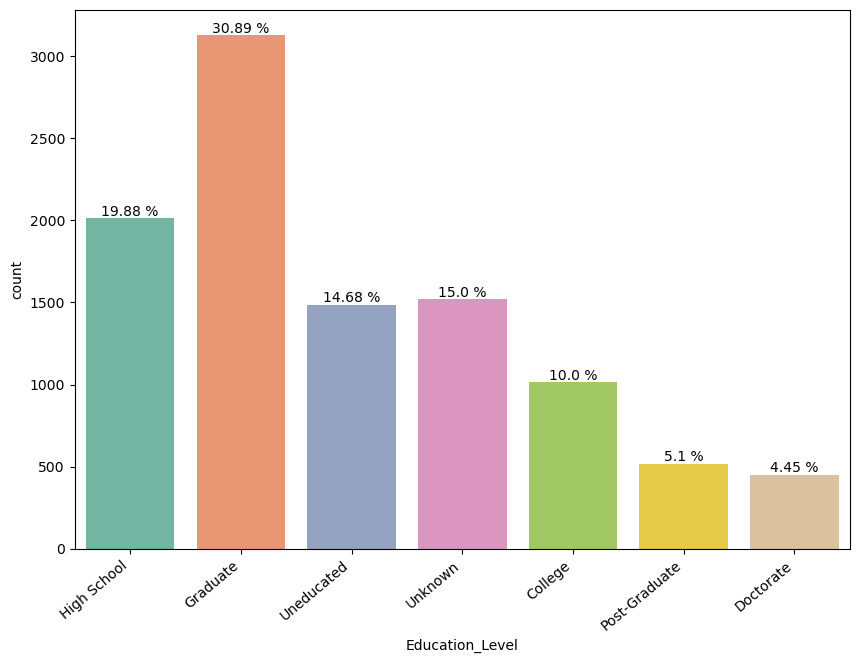

In [21]:
# Define a custom color palette with colors matching the number of categories
custom_palette = sns.color_palette("Set2", n_colors=len(DF["Education_Level"].unique()))

# Plot the graph with colors on bars
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.countplot(x=DF["Education_Level"], palette=custom_palette)  # Pass the adjusted palette

# Set the x-axis tick positions and labels with rotation
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

count = len(DF["Education_Level"])
for bar in ax.patches:
    percentage = f"{round(bar.get_height() / count * 100, 2)} %"
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.annotate(percentage, (x, y), ha="center", va="bottom")

plt.show()

* Interpretation: Most people are graduates or have completed high school, which adds up to 51% of the total population.

### Analysis of  Marital Status: Marital status of a card holder 

In [22]:
info_of_cat("Marital_Status")

Unique values in Marital_Status are: ['Married' 'Single' 'Unknown' 'Divorced']
Mode of Marital_Status is Married
Number of missing values in Marital_Status is 0


Married     46.282216
Single      38.935519
Unknown      7.396070
Divorced     7.386195
Name: Marital_Status, dtype: float64


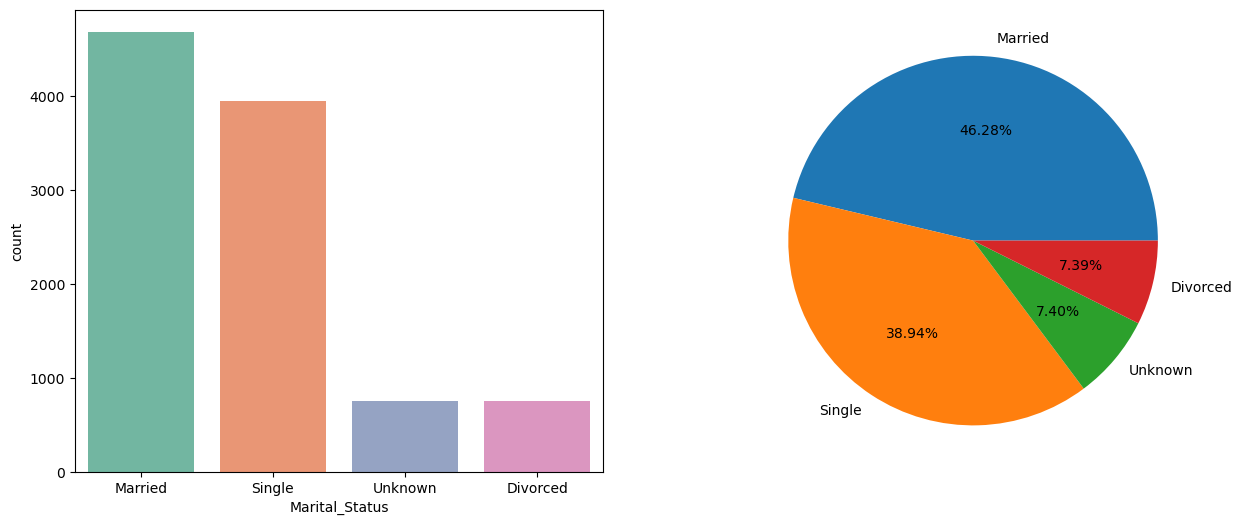

In [23]:
custom_palette = sns.color_palette("Set2", n_colors=len(DF["Marital_Status"].unique()))
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
percentage = (DF["Marital_Status"].value_counts()/len(DF))*100      # value count is a function to calulate the number of the column marital status 
                                                                        #keeping its classes as index. 
print(percentage)
sns.countplot(x = DF["Marital_Status"], ax = ax[0], palette=custom_palette)
labels = list(DF["Marital_Status"].value_counts().index)            # value_counts returns the count of the classes present in the marital status and its index which is the class name 
                                                                         # is accessed by the index; in sequence format and then converted into the list. 
ax[1].pie(percentage,labels = labels, autopct= "%0.2f%%")           # autpct: is the way how the number would print on the graph.
plt.show()

* Interpretation:  46% of the people are Married and 39% are Single. 

###  Analysis of  Income Category: Income category of a card holder 

In [24]:
info_of_cat( "Income_Category")

Unique values in Income_Category are: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Mode of Income_Category is Less than $40K
Number of missing values in Income_Category is 0


Less than $40K    35.163425
$40K - $60K       17.675521
$80K - $120K      15.157500
$60K - $80K       13.844179
Unknown           10.980547
$120K +            7.178829
Name: Income_Category, dtype: float64


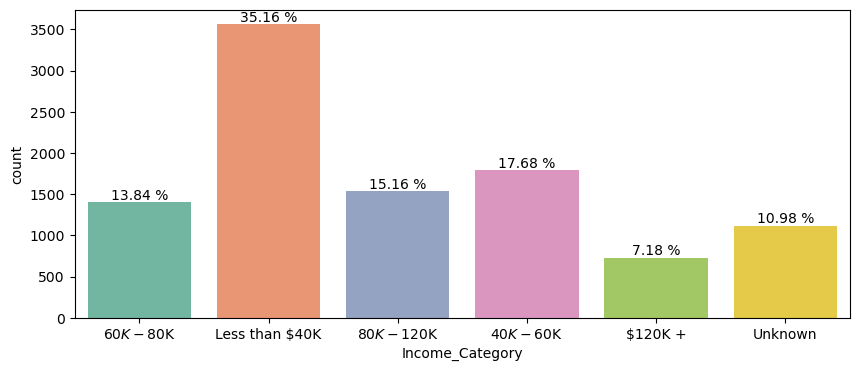

In [25]:
custom_palette = sns.color_palette("Set2", n_colors=len(DF["Income_Category"].unique()))
print((DF["Income_Category"].value_counts()/len(DF))*100)               #First calculated the number of income category via value counts inbuilt function and then 
                                                                            #calculated the percentage of it.
fig, ax = plt.subplots(figsize = (10, 4))
sns.countplot(x = DF[ 'Income_Category'], ax = ax,palette=custom_palette)
for bar in ax.patches:                                                  # ax.patches returns the rectange object from matplotlib
    percentage = f"{round((bar.get_height() /DF.shape[0])*100 , 2)} %"  # first it calculate the bar height and then dividing by the number of rows in data and 
                                                                            #multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                                # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                                # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va= "bottom", ha = "center" )       # annotate: used to annotate over objects. here objects are the bars.
plt.show()

* Interpretation: Majority of the population is earning less than $40k.

###  Analysis of Total Relationship Count: Years of relationship with bank 

In [26]:
info_of_cat("Total_Relationship_Count")

Unique values in Total_Relationship_Count are: [5 6 4 3 2 1]
Mode of Total_Relationship_Count is 3
Number of missing values in Total_Relationship_Count is 0


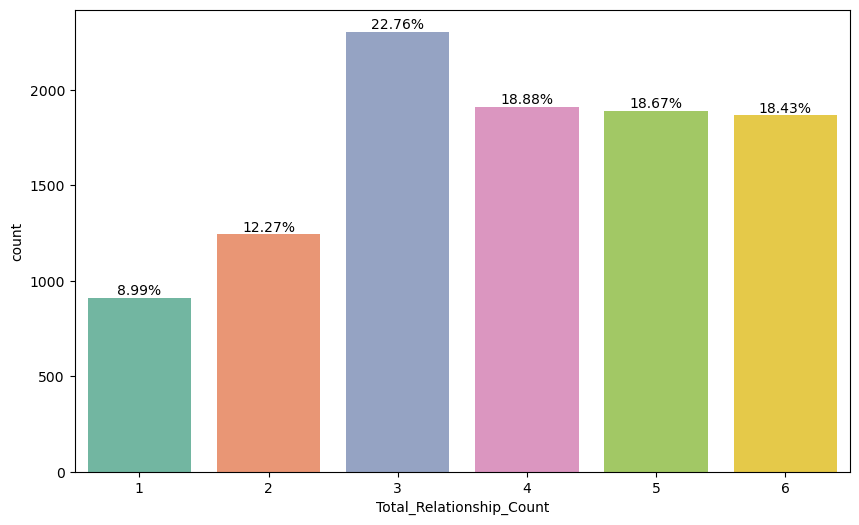

In [27]:
custom_palette = sns.color_palette("Set2", n_colors=len(DF["Total_Relationship_Count"].unique()))
fig, ax = plt.subplots(figsize  = (10 , 6))
ax = sns.countplot(x = DF["Total_Relationship_Count"],palette=custom_palette)
bar_percentage(ax, len(DF))                            # calling the function to plot the percentage on the bars

* Interpretation: Usually people have three years of relationship with the bank. Then, there is a decline of 3%. Later, there is  very little variation. Approximately 20% of the people tend to leave in their first two years.

###  Analysis of  Months of Inactivity: Months elapsed since the last activity using a credit card 

In [28]:
info_of_cat('Months_Inactive_12_mon' )

Unique values in Months_Inactive_12_mon are: [1 4 2 3 6 0 5]
Mode of Months_Inactive_12_mon is 3
Number of missing values in Months_Inactive_12_mon is 0


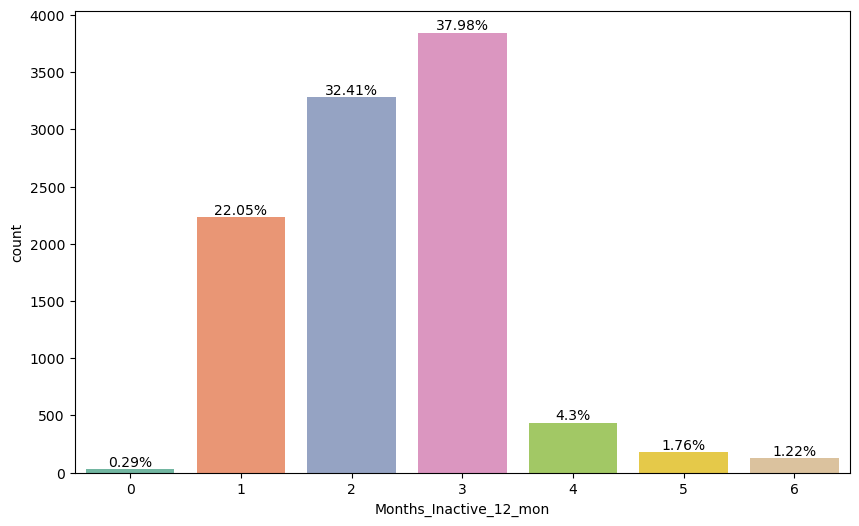

In [29]:
custom_palette = sns.color_palette("Set2", n_colors=len(DF["Months_Inactive_12_mon"].unique()))
fig, ax = plt.subplots(figsize  = (10 , 6))
ax = sns.countplot(x = DF['Months_Inactive_12_mon'],palette=custom_palette)
bar_percentage(ax, len(DF))                         # calling the function to plot the percentage on the bars
plt.show()

* Interpretation: Majority of the customers are inactive for 3 months.

# $$\;\;\;\;\;\;Univariate \ Analysis \ of \ Numerical \ Variables$$

LEVEL 1 Analysis of Numerical Columns
----------------------------------------------------------
Check if the data is discrete or continuous. \
Measure the central tendency (mean, median, mode) \
Measure the dispersion values \
Check for missing values \
Checking for skewness\
Check for outliers \
Think about how the missing values could be treated. \
Think about the kind of graph/chart that can be plotted using this data.


### User defined function for calculating mean, median, mode,  standard deviation, and count of all null values  

In [30]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {DF[col].mean()}")
    print(f"The median of the {col} is {DF[col].median()}")
    print(f"The mode of the {col} is {DF[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {DF[col].std()}")
    print(f"Number of missing values in the {col} is {DF[col].isnull().sum()}")

### Analysis of  the Customer Age: Age of the customer 

In [31]:
info_of_numerical("Customer_Age")

The mean of the Customer_Age is 46.382245482373854
The median of the Customer_Age is 46.0
The mode of the Customer_Age is 44
The standard deviation of the Customer_Age is 8.341393132886584
Number of missing values in the Customer_Age is 0


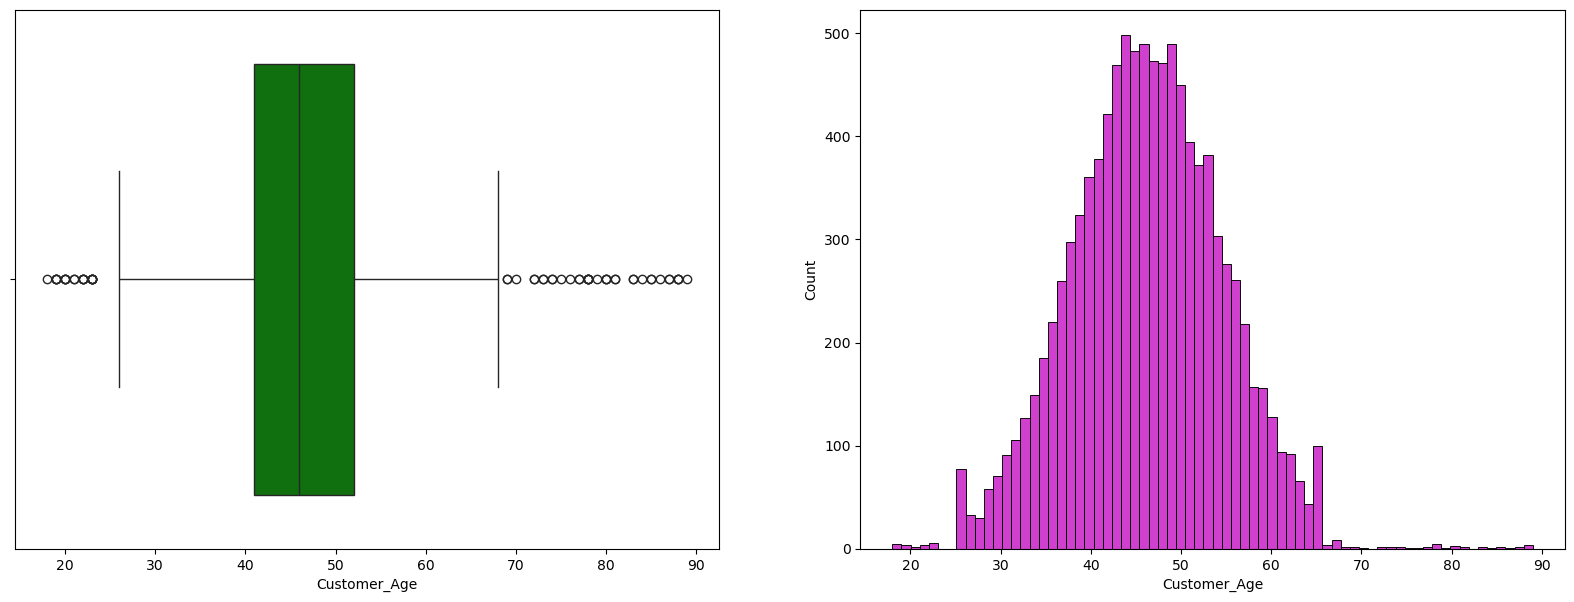

In [32]:
# Distribution of Customer_Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = DF["Customer_Age"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = DF["Customer_Age"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

* Interpretation: The customer age follows the normal distribution. There are few customers with ages over 77. The analytics team decides to replace the ages greater than 75 with the average age of other customers.

###  Outliers Analysis and Treatment:
Customers who are above 75 years of age are outliers. To treat the outliers, their age is replaced by the mean. 

In [33]:
mean = int(DF.Customer_Age.mean())
# accessing the data higher than 6
x = DF[DF["Customer_Age"] > 75].index
for index in x:
    DF.loc[index, "Customer_Age"] = mean

In [34]:
info_of_numerical("Customer_Age")

The mean of the Customer_Age is 46.28962180310062
The median of the Customer_Age is 46.0
The mode of the Customer_Age is 46
The standard deviation of the Customer_Age is 8.139786651281025
Number of missing values in the Customer_Age is 0


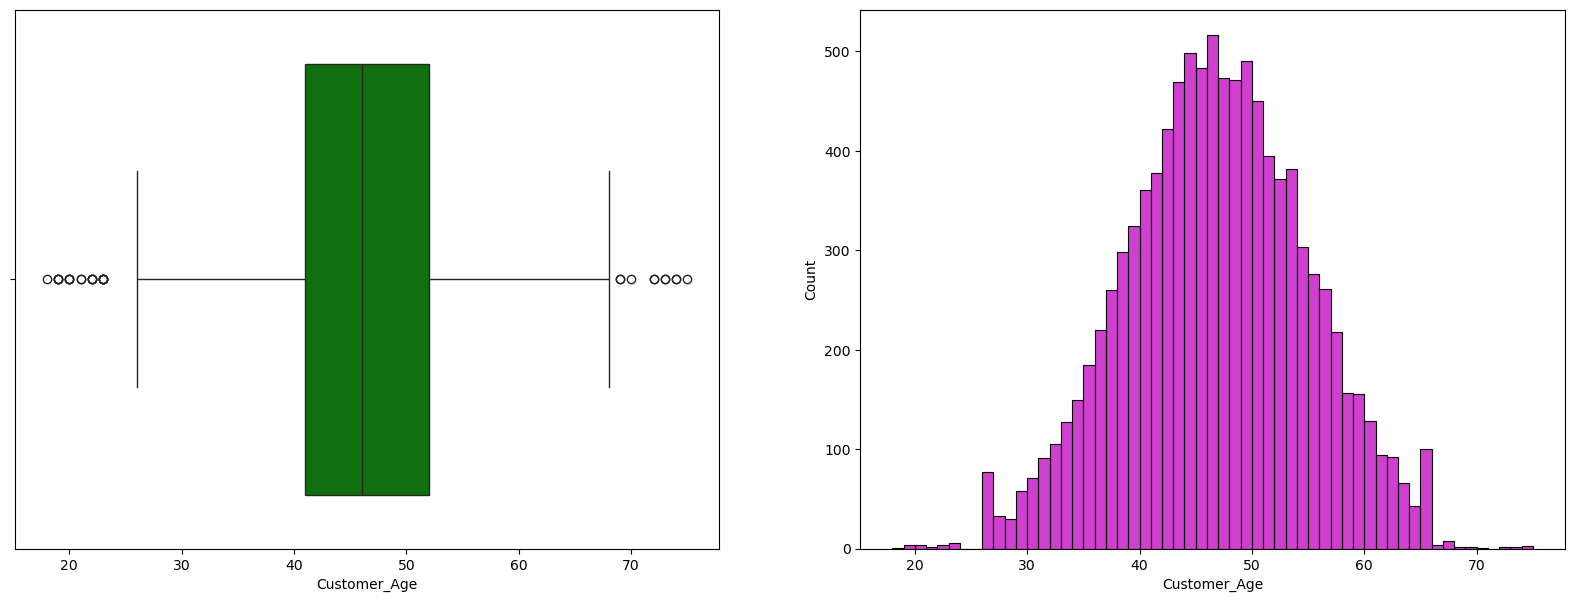

In [35]:
# Distribution of Customer_Age (Outlier Analysis)
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = DF["Customer_Age"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = DF["Customer_Age"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

* Interpretation: Most likely, customer age follows normal distribution. Most of the bank customers are in between 40 and 50 years of age.

### Analysis of  Total_Revolving_Bal: Balance that is carried over month to month 

In [36]:
info_of_numerical("Total_Revolving_Bal")

The mean of the Total_Revolving_Bal is 1162.8140614199665
The median of the Total_Revolving_Bal is 1276.0
The mode of the Total_Revolving_Bal is 0
The standard deviation of the Total_Revolving_Bal is 814.9873352357697
Number of missing values in the Total_Revolving_Bal is 0


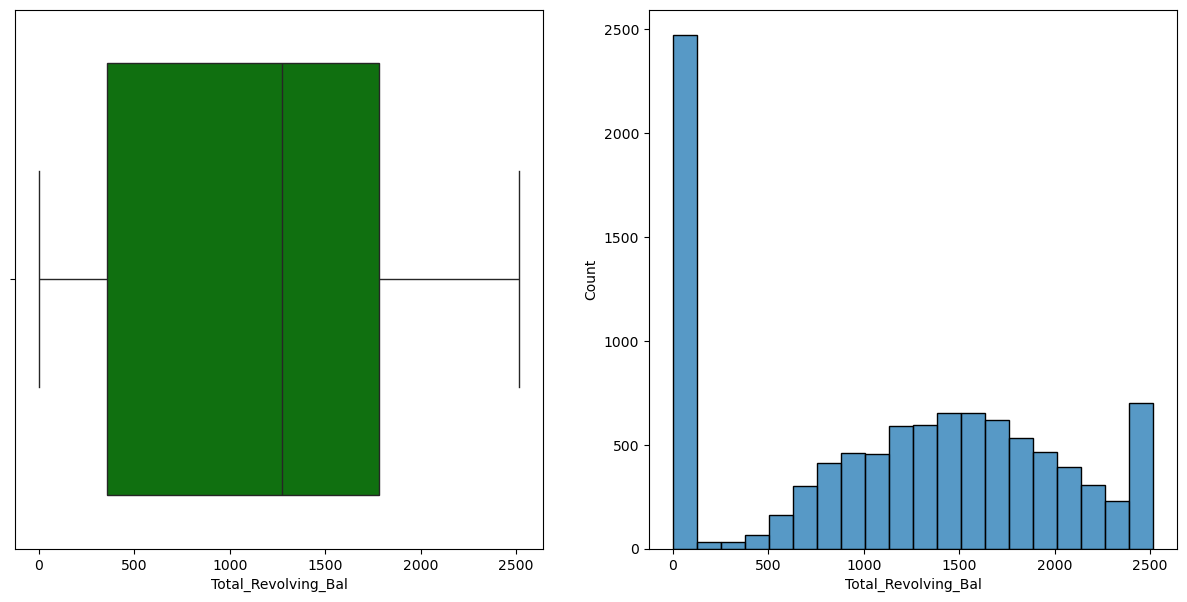

In [37]:
fig, ax = plt.subplots(1, 2, figsize= (15, 7))
sns.histplot(x = DF['Total_Revolving_Bal'])                         # x axis contains the revolving balance amount in dollars.
                                                                    # y axis has the count of the customers.
sns.boxplot(x = DF['Total_Revolving_Bal'], ax = ax[0], color = "g") # c : color: b is black
plt.show()

* Interpretation: There is a spike at the 0 Revolving Balance, which indicates the majority of people tend to have 0 Revolving Balance. Around 25% of the customers do not have a revolving balance, i.e. they settle the credit card bill within a month. Around 75% of customers do not pay the credit card balance on time. These are the profitable customers to the bank (they pay interest on the revolving balance).

###  Analysis of  Avg_Open_To_Buy:  

### Difference between the credit limit assigned to a cardholder and the present balance on the account at that time.

```Description: Monthly credit limit is $12,000.  If the customer spends $5,000 in a month, then the remaining balance is $7,000 which is called "Average Open to Buy".```

In [38]:
info_of_numerical("Avg_Open_To_Buy")

The mean of the Avg_Open_To_Buy is 7469.139636614989
The median of the Avg_Open_To_Buy is 3474.0
The mode of the Avg_Open_To_Buy is 1438.3
The standard deviation of the Avg_Open_To_Buy is 9090.685323679128
Number of missing values in the Avg_Open_To_Buy is 0


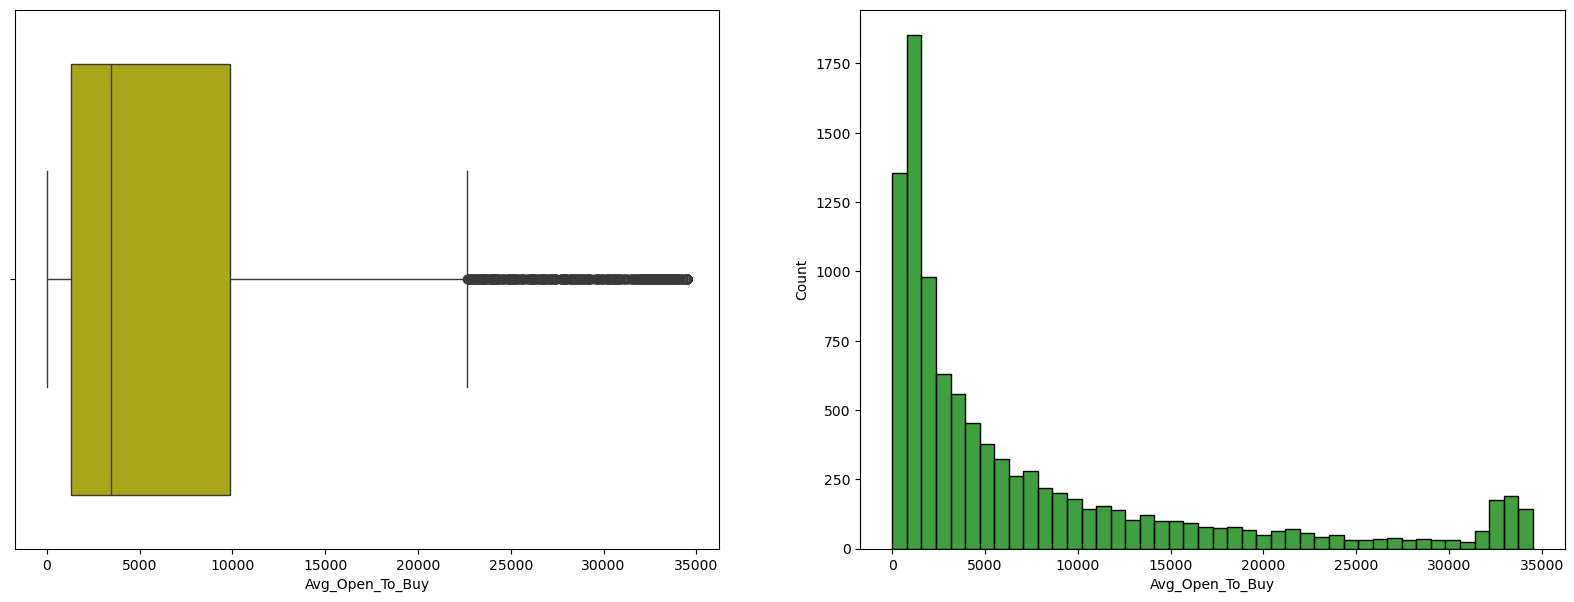

In [39]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))
sns.histplot(DF["Avg_Open_To_Buy"], ax = ax[1], color= "g")     # xaxis: its a dollar amount which shows the difference between the credit limit and the prersent balance
sns.boxplot(x = DF['Avg_Open_To_Buy'], ax = ax[0], color = "y") # color = y:  yellow
plt.show()

* Outliers Analysis
This is right skewed data but the strength of outliers is increasing at the end of the tail which indicates that outliers are not a human error but some people are showing behavior other than population.


### Analysis of  the Total Transaction Count: Number of transactions made by the card holder 

In [40]:
info_of_numerical("Total_Trans_Ct")

The mean of the Total_Trans_Ct is 64.85869457884863
The median of the Total_Trans_Ct is 67.0
The mode of the Total_Trans_Ct is 81
The standard deviation of the Total_Trans_Ct is 23.472570449233046
Number of missing values in the Total_Trans_Ct is 0


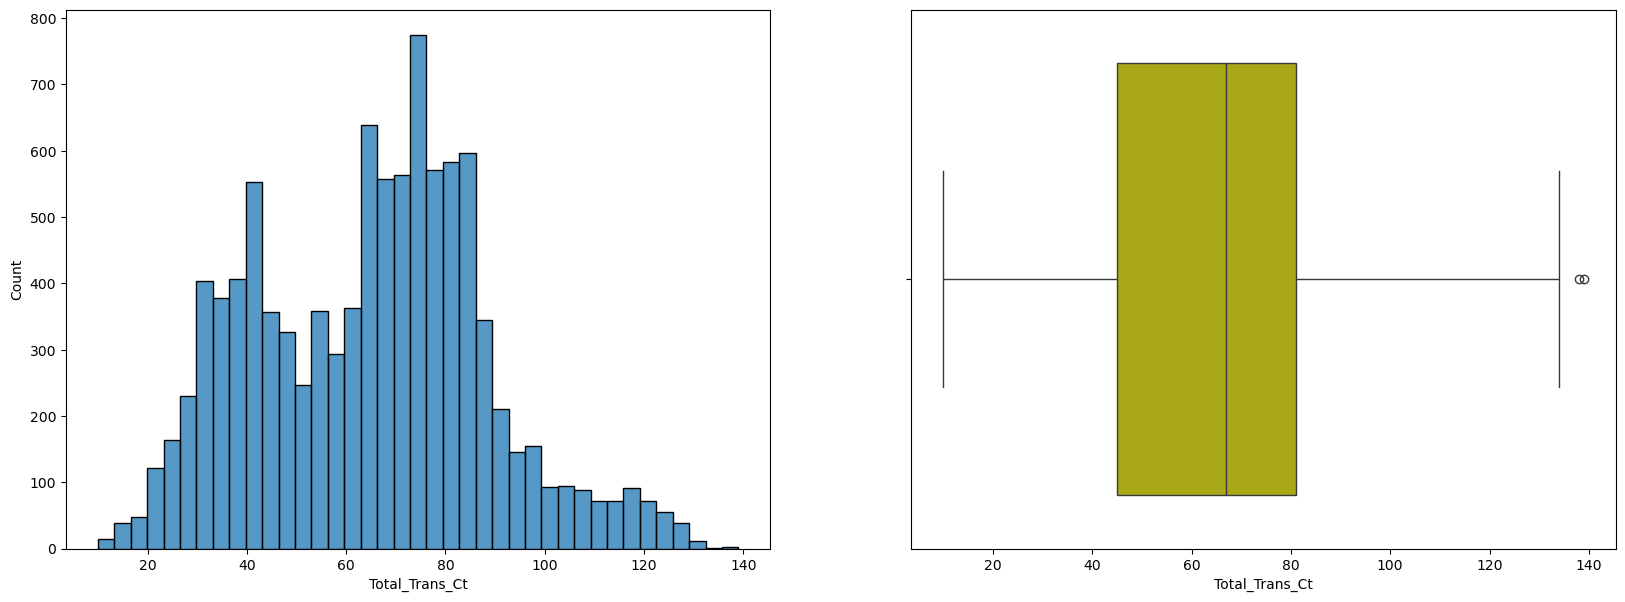

In [41]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))
sns.histplot(x = DF['Total_Trans_Ct'], ax = ax[0]) #ax[0]: graph(Histogram) will be ploted at 0th position
sns.boxplot(x = DF["Total_Trans_Ct"], ax = ax[1],color = "y")  #ax[1]: graph(Boxplot) will be ploted at 0th position
plt.show()

* Interpretation: Majority of the customers are making more than 50 transactions.

### Analysis of  the Avg_Utilization_Ratio: It is a ratio of Total Revolving Balance to Credit Limit.
#### $$\frac{Total\;Revolving\; Balance}{Credit \;Limit}$$
### The higher the value, the more the customers are spending. 

In [42]:
info_of_numerical("Avg_Utilization_Ratio")

The mean of the Avg_Utilization_Ratio is 0.2748935518909845
The median of the Avg_Utilization_Ratio is 0.176
The mode of the Avg_Utilization_Ratio is 0.0
The standard deviation of the Avg_Utilization_Ratio is 0.2756914692523933
Number of missing values in the Avg_Utilization_Ratio is 0


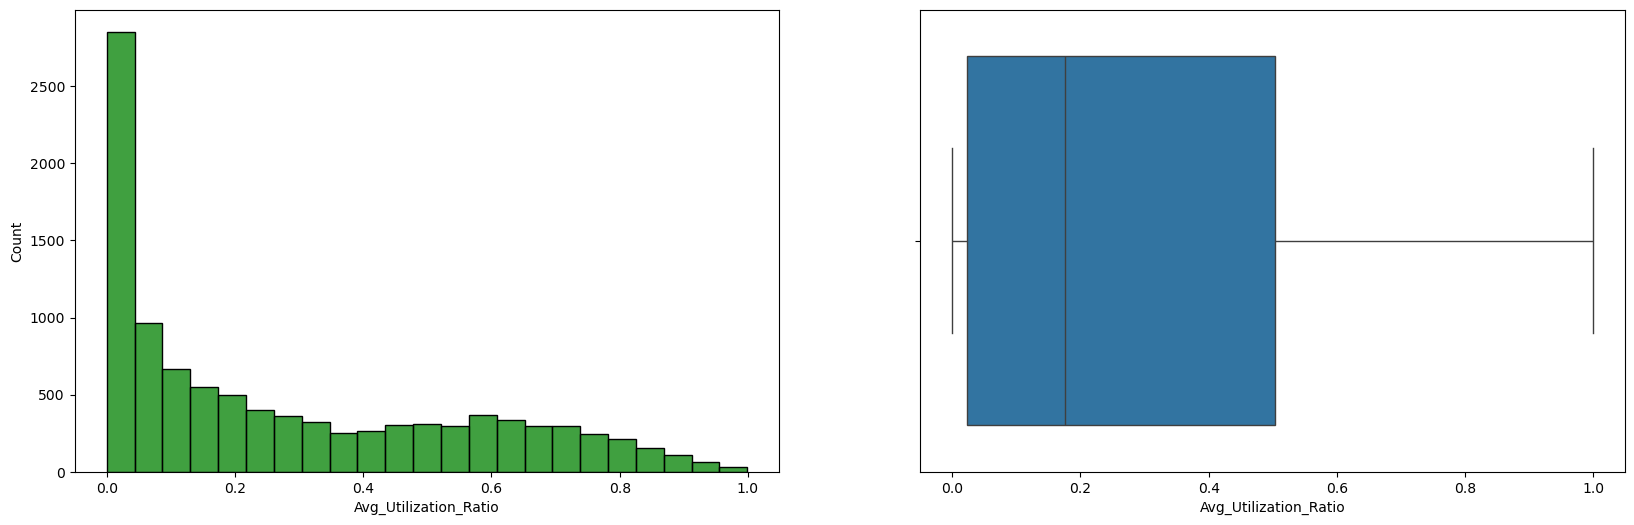

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
sns.histplot(x = DF['Avg_Utilization_Ratio'], ax = ax[0],color = "g")  #  ax[0]: graph(Histogram) will be ploted at 0th position
sns.boxplot(x = DF['Avg_Utilization_Ratio'], ax = ax[1])   #  ax[1]: graph(Boxplot) will be ploted at 0th position
plt.show()

* Interpretation: This is a right skewed data with no outliers. Around 75% of the customers are having low utilization (less than 0.5 utilization).

### Level 2 Analysis  Bi-Variate Analysis

In [44]:
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical               continuous
------------------------  ---------------------
Attrition_Flag            CLIENTNUM
Customer_Age              Credit_Limit
Gender                    Total_Revolving_Bal
Dependent_count           Avg_Open_To_Buy
Education_Level           Total_Trans_Amt
Marital_Status            Total_Trans_Ct
Income_Category           Avg_Utilization_Ratio
Card_Category
Region
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon


###  Relationship of Attrition_Flag with Gender 

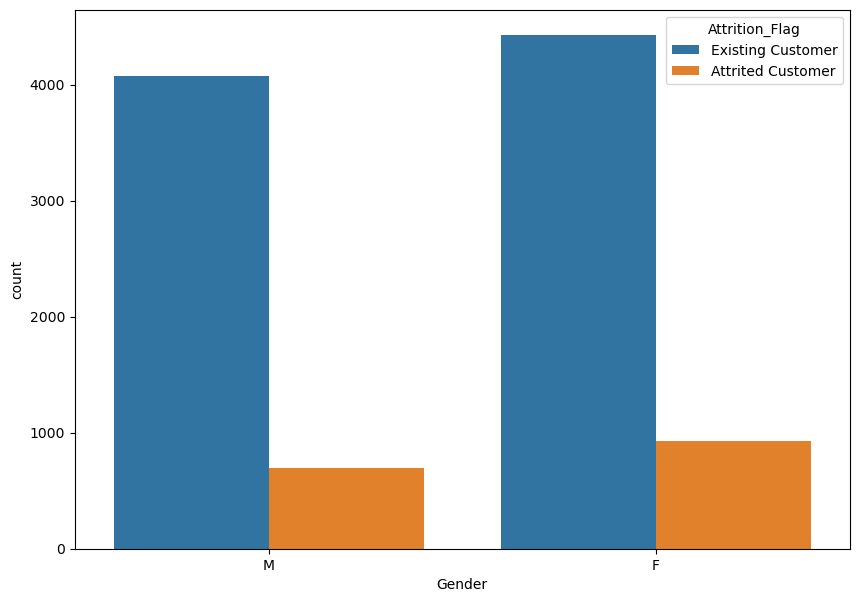

In [45]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Gender", hue = "Attrition_Flag", data = DF)
plt.show()

* Interpretation: Percentage of women getting churned out is more than men.

### Relationship of Attrition_Flag with Dependent_count 

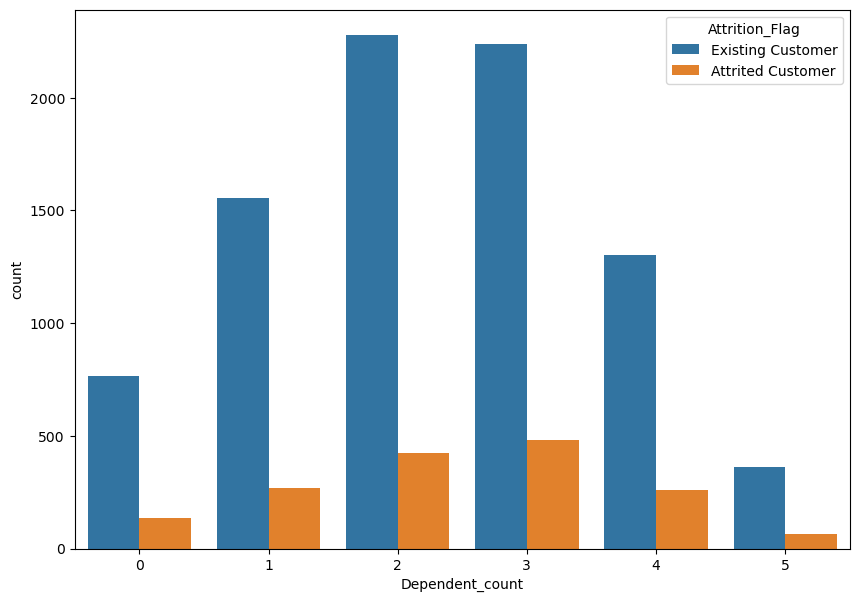

In [46]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Dependent_count", hue = "Attrition_Flag", data = DF)
plt.show()

* Interpretation: Customers who are attrited or existing have a maximum of 2 to 3 dependents on them.

###  Relationship of Attrition_Flag with Education_Level 
Categorical to Categorical

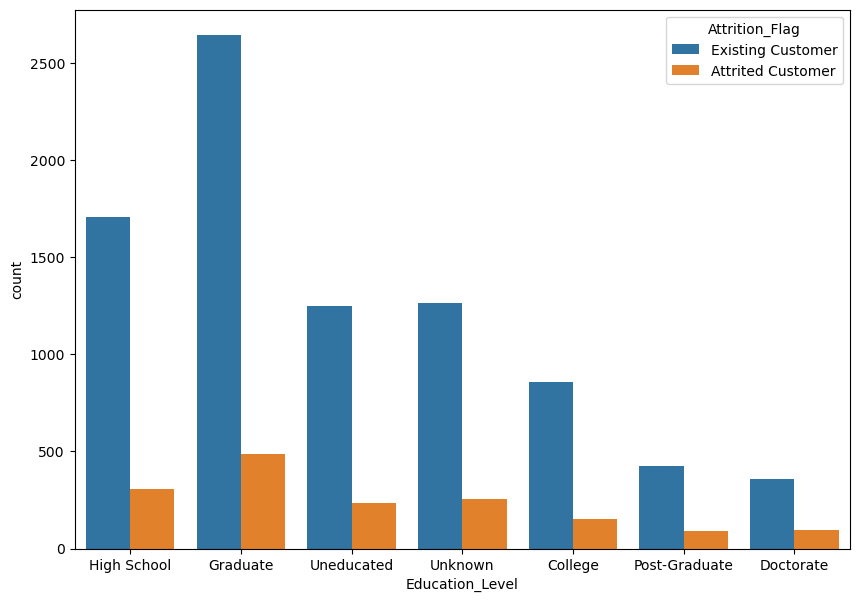

In [47]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Education_Level", hue = "Attrition_Flag", data = DF)
plt.show()

* Interpretation: Graduate and High School customers have a higher Attrition rate compared to another education level. 

###  Relationship of Attrition_Flag with Income_Category 
Categorical to Categorical

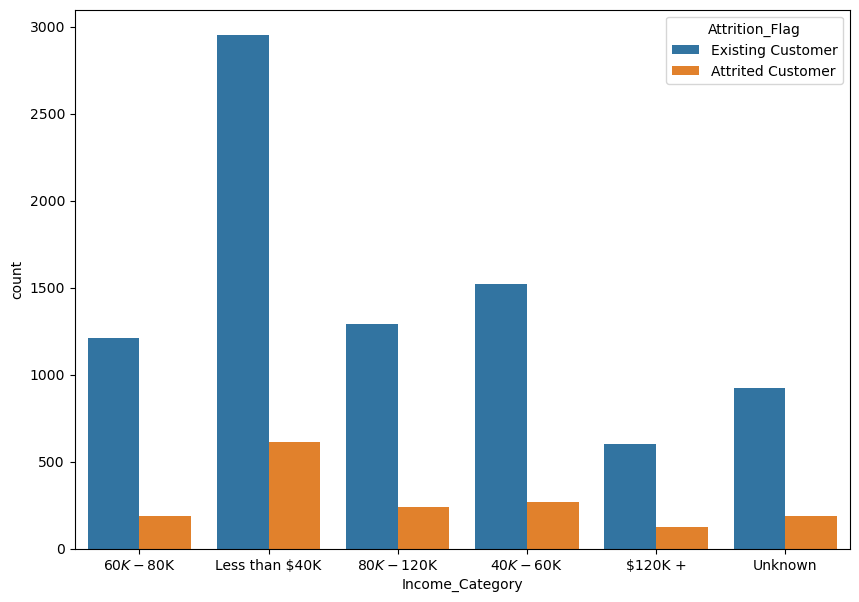

In [48]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Income_Category", hue = "Attrition_Flag", data = DF)
plt.show()

* Interpretation: Almost 20-30% of customers who attrited are earning less than $40,000.

###  Relationship of Attrition_Flag with Card_Category 
Categorical to Categorical

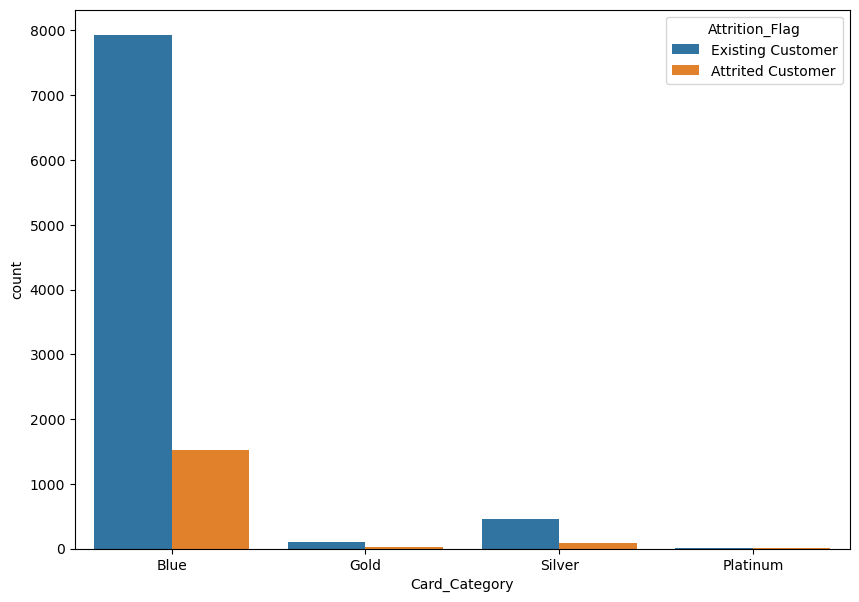

In [49]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Card_Category", hue = "Attrition_Flag", data = DF)
plt.show()

* Interpretation: Majority of the customers are churning from the blue card category. It is also to be noted that the maximum customers are also blue card holders.  

###  Relationship of Attrition_Flag with Customer_Age 
Categorical to continuous

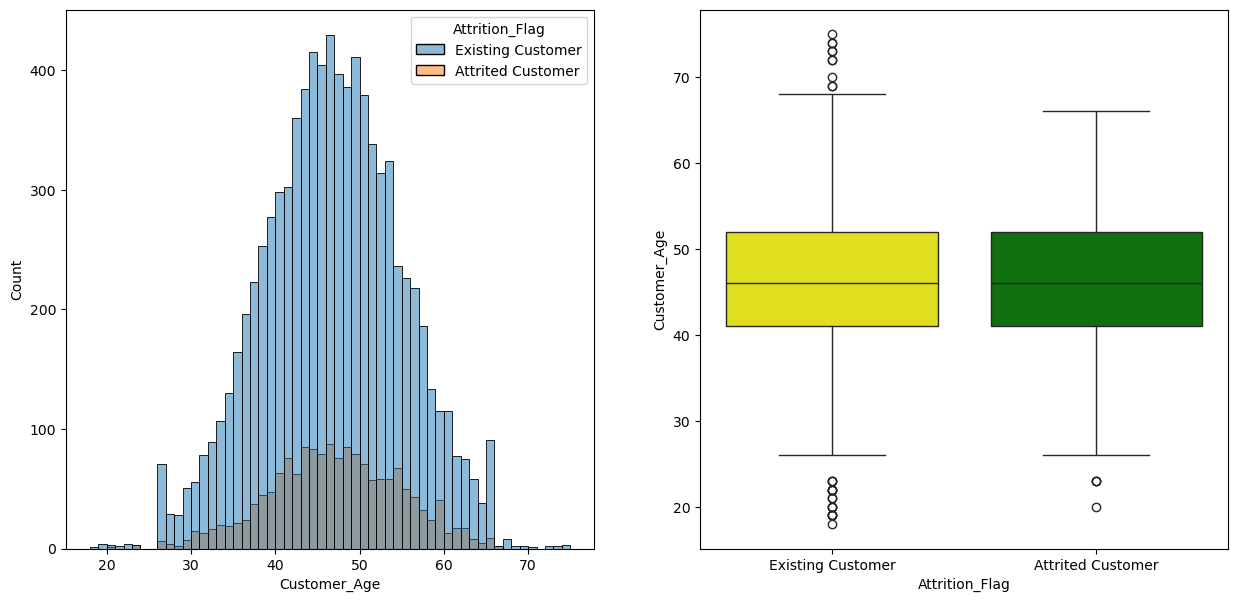

In [50]:
custom_palette = {'Existing Customer': 'yellow', 'Attrited Customer': 'green'}

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Create a histogram with hue
sns.histplot(x=DF["Customer_Age"], hue=DF["Attrition_Flag"], ax=ax[0])

# Create a boxplot with the custom color palette
sns.boxplot(y=DF["Customer_Age"], x=DF["Attrition_Flag"], ax=ax[1], palette=custom_palette)

plt.show()

* Interpretation: Most of the bank customers  are between 40 to 50 years of age. 

### Relationship of Attrition_Flag with Credit_Limit
Categorical to continuous 

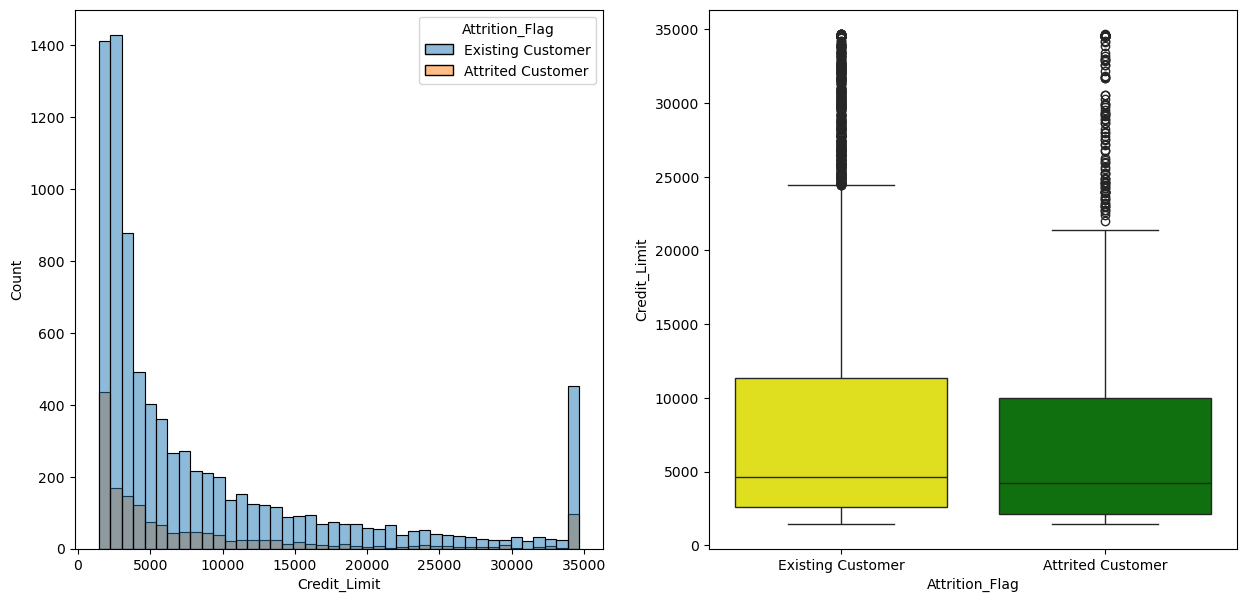

In [51]:
custom_palette = {'Existing Customer': 'yellow', 'Attrited Customer': 'green'}
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = DF["Credit_Limit"], hue = DF["Attrition_Flag"], ax = ax[0])
sns.boxplot(x = DF["Attrition_Flag"] ,y = DF["Credit_Limit"] , ax = ax[1],palette=custom_palette)
plt.show()

* Interpretation:This is a right skewed data.There is not a significant difference in the credit limit of the existing customers and those who have left the bank. This paves way for interesting analysis as to why customers choose to stay with the bank or leave. 

### Relationship of Attrition_Flag with Avg_Utilization_Ratio
Categorical to continuous 

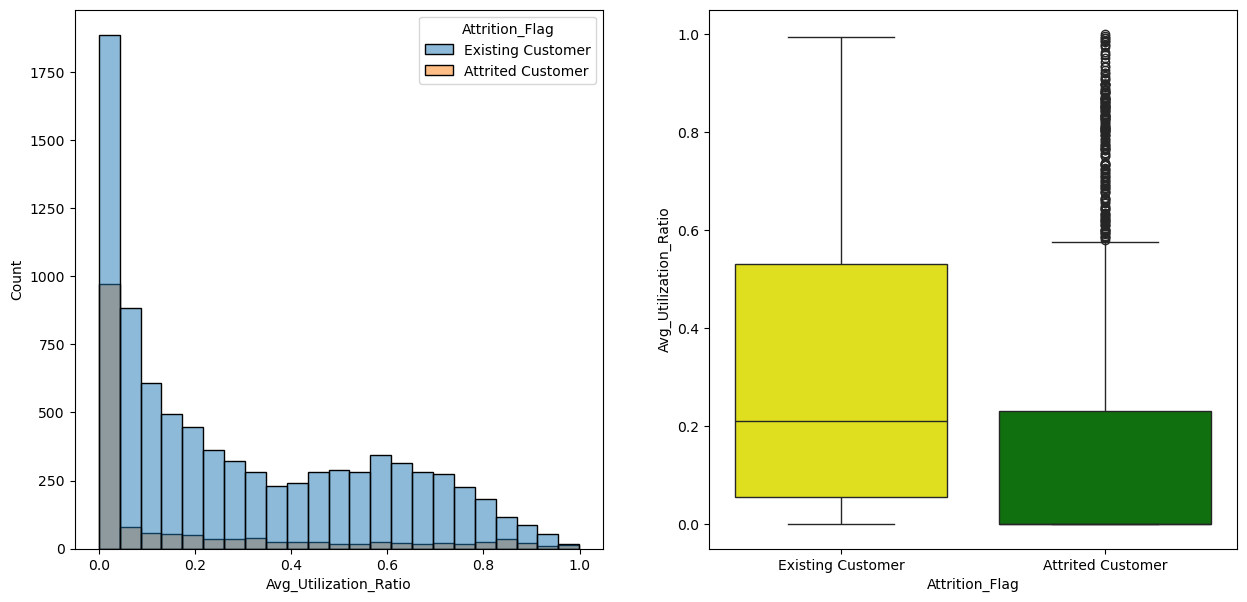

In [52]:
custom_palette = {'Existing Customer': 'yellow', 'Attrited Customer': 'green'}
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = DF["Avg_Utilization_Ratio"], hue = DF["Attrition_Flag"], ax = ax[0])
sns.boxplot(x = DF["Attrition_Flag"] ,y = DF["Avg_Utilization_Ratio"] , ax = ax[1],palette=custom_palette)
plt.show()

* Interpretation: Customers who churned have very low usage. Most of them haven't used their cards. Around  75% of customers who churned have usage only of only 0.2%.

### Saving the updated file 

In [53]:
#DF.to_csv('Customer_Churn.csv')